In [34]:
import torch
from torchvision.datasets import FashionMNIST
import numpy as np
from torch.utils.data import DataLoader
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

In [ ]:
label_dict = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot",
}

# zamiana obrazaka na macierz
transform = transforms.Compose(
    [
        transforms.ToTensor(),
    ]
)

dataset_train = FashionMNIST(
    root="./data", train=True, download=True, transform=transform
)
dataset_test = FashionMNIST(
    root="./data", train=False, download=True, transform=transform
)

train_loader = DataLoader(dataset_train, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset_test, batch_size=64, shuffle=False)

torch.Size([64, 1, 28, 28])
(28, 28)


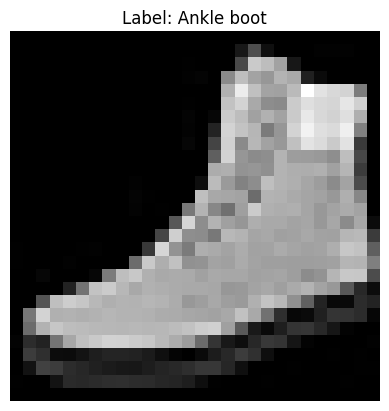

In [ ]:
def show_image(image, label, cmap="grey"):
    plt.imshow(image, cmap=cmap)
    plt.title(f"Label: {label}")
    plt.axis("off")
    plt.show()


for images, labels in train_loader:
    print(images.shape)
    image = images[0].numpy().squeeze()
    print(image.shape)
    label = labels[0].item()
    label = label_dict[label]
    show_image(image, label)
    break

In [ ]:
from torch import nn, optim

simple_nn = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28 * 28, 128),
    nn.ReLU(),  # funkcja liniowa ag=rgumentem jest waga razy x plus stala
    nn.Linear(128, 10),
    nn.Softmax(),
)

criterion = nn.CrossEntropyLoss()

In [ ]:
opitmizer = optim.Adam(simple_nn.parameters(), lr=0.001)
epochs = 5

simple_nn.train()

for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:

        opitmizer.zero_grad()
        outputs = simple_nn(images)
        loss = criterion(outputs, labels)
        loss.backward()
        opitmizer.step()
        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], loss: {running_loss/len(train_loader):.4f}")

c:\Users\User\matma_studia-2\sem4\FashionMNIST_Classification\.venv\Lib\site-packages\torch\nn\modules\module.py:1751: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch [1/5], loss: 1.7454
Epoch [2/5], loss: 1.6781
Epoch [3/5], loss: 1.6681
Epoch [4/5], loss: 1.6618
Epoch [5/5], loss: 1.6560


In [ ]:
accuracy = 0.0
simple_nn.eval()

with torch.no_grad():
    for images, labels in test_loader:
        outputs = simple_nn(images)
        print(outputs[0])
        break
        _, predict = torch.max(outputs, 1)
        accuracy += (predict == labels).float().mean()

accuracy /= len(test_loader)
print(f"test: {accuracy:.4f}")

tensor([8.7117e-12, 5.3999e-15, 1.4675e-11, 8.0352e-11, 3.9735e-11, 2.4718e-02,
        2.8170e-09, 1.8770e-02, 1.4407e-05, 9.5650e-01])
test: 0.0000


c:\Users\User\matma_studia-2\sem4\FashionMNIST_Classification\.venv\Lib\site-packages\torch\nn\modules\module.py:1751: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


pres 9, ac 9


c:\Users\User\matma_studia-2\sem4\FashionMNIST_Classification\.venv\Lib\site-packages\torch\nn\modules\module.py:1751: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


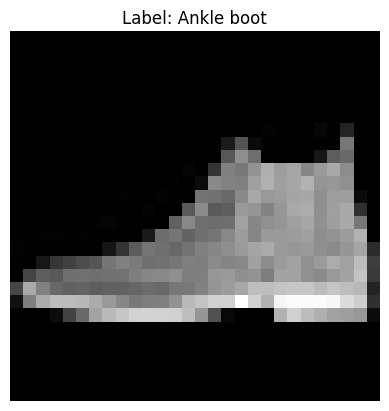

In [ ]:
some_img, some_label = dataset_test[0]
some_img = some_img.unsqueeze(0)
output = simple_nn(some_img)
_, predicted_label = torch.max(output, 1)
predicted_label = predicted_label.item()
print(f"pres {predicted_label}, ac {some_label}")
show_image(some_img.squeeze().numpy(), label_dict[predicted_label])